# Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = 'retina'

# Image as matrices of pixels

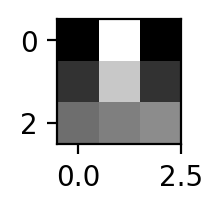

In [2]:
#Creating a simple 3x3 Grayscale image
%config InlineBackend.figure_formats = 'retina'
img = np.array([[   0, 255,   0],   #   black,  white,     black
                [  50, 200,  50],   #    dark,  light,      dark
                [ 110, 127, 140]])  # mid-dark,   mid, mid-light
fig, ax = plt.subplots( figsize = (1,1), constrained_layout=True)
plt.imshow(img, cmap='gray')

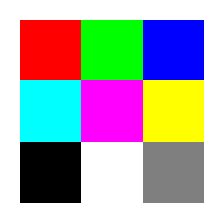

In [10]:
# This time, each pixel is an [R,G,B] triad
img = np.array([[[255,   0,   0], [  0, 255,   0], [  0,   0, 255]],   #   red,   green,     blue
                [[  0, 255, 255], [255,   0, 255], [255, 255,   0]],   #  cyan, magenta,   yellow
                [[  0,   0,   0], [255, 255, 255], [127, 127, 127]]])  # black,   white, gray 50%
fig, ax = plt.subplots( figsize = (1,1), constrained_layout=True)
plt.axis("off")
plt.imshow(img)

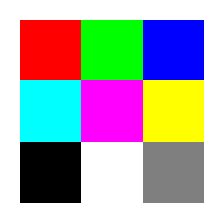

In [12]:
# Now let's create the same image with floating point numbers.

img = np.array([[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]],    #  red,   green,     blue
                [[0.0, 1.0, 1.0], [1.0, 0.0, 1.0], [1.0, 1.0, 0.0]],    # cyan, magenta,   yellow
                [[0.0, 0.0, 0.0], [1.0, 1.0, 1.0], [0.5, 0.5, 0.5]]])   # black,  white, gray 50%
fig, ax = plt.subplots( figsize = (1,1), constrained_layout=True)
plt.axis("off")
plt.imshow(img)

# Rotations and flips

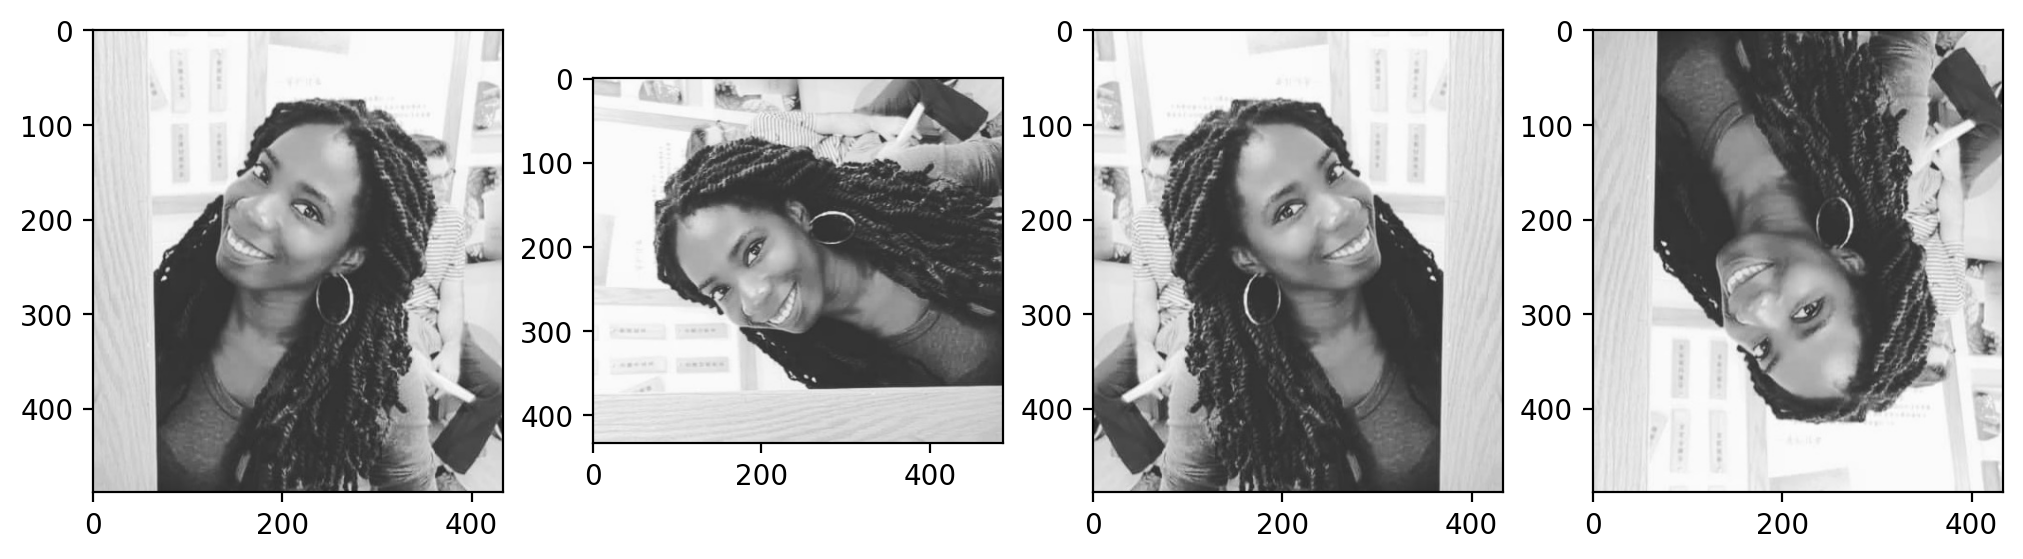

In [12]:
img = plt.imread('pic.jpg')#Let's import my profile picture
img2 = np.rot90(img,1) #rotating it 90 degrees counter clockwise
img3 = np.fliplr(img) #horizontal flip
img4 = np.flipud(img) # Vertical flip

fig, ax = plt.subplots(1,4,figsize = (10,3),constrained_layout=True)
#plt.axis("off")
ax[0].imshow(img)
ax[1].imshow(img2)
ax[2].imshow(img3)
ax[3].imshow(img4)

# From color to Black and White

## Gray Scale

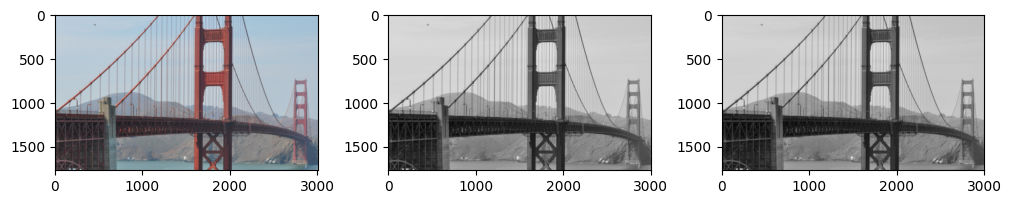

In [2]:
gate = plt.imread('golden_gate.jpg')#Let's import a picture of the golden gate
gate_gs = np.dot (gate[...,:3],[1/3,1/3,1/3]) #using average scale
gate_ws = np.dot (gate[...,:3],[0.299,0.587,0.114]) #using weighted scale

fig, ax = plt.subplots(1,3,figsize = (10,3),constrained_layout=True)
ax[0].imshow(gate)
ax[1].imshow(gate_gs, cmap='gray')
ax[2].imshow(gate_ws, cmap='gray')

## Black and White

In [3]:
#Define a function that converts a grayscale image to black and white using a global threshold
#make it 0 if less then threshold else 255
def grayscale_to_BW(grayscale_pic, threshold):
    rows, cols = np.shape(grayscale_pic)
    BW_pic = np.zeros((rows,cols))
    for i in range(rows):
        for j in range(cols):
            BW_pic[i,j] = 0 if grayscale_pic[i,j] <= threshold else 255
    return BW_pic

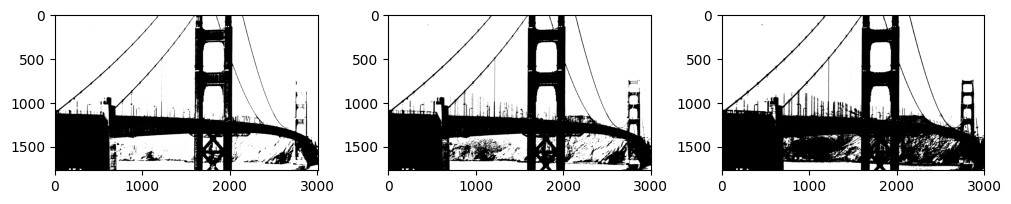

In [4]:
gate_b1 = grayscale_to_BW(gate_ws,115) # going for 45%
gate_b2 = grayscale_to_BW(gate_ws,127) # going for 50%
gate_b3 = grayscale_to_BW(gate_ws,140) # going for 55%

fig, ax = plt.subplots(1,3,figsize = (10,3),constrained_layout=True)
ax[0].imshow(gate_b1, cmap='gray')
ax[1].imshow(gate_b2, cmap='gray')
ax[2].imshow(gate_b3, cmap='gray')

# Resolution and Filters

## Filters

In [1]:
pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 6.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2

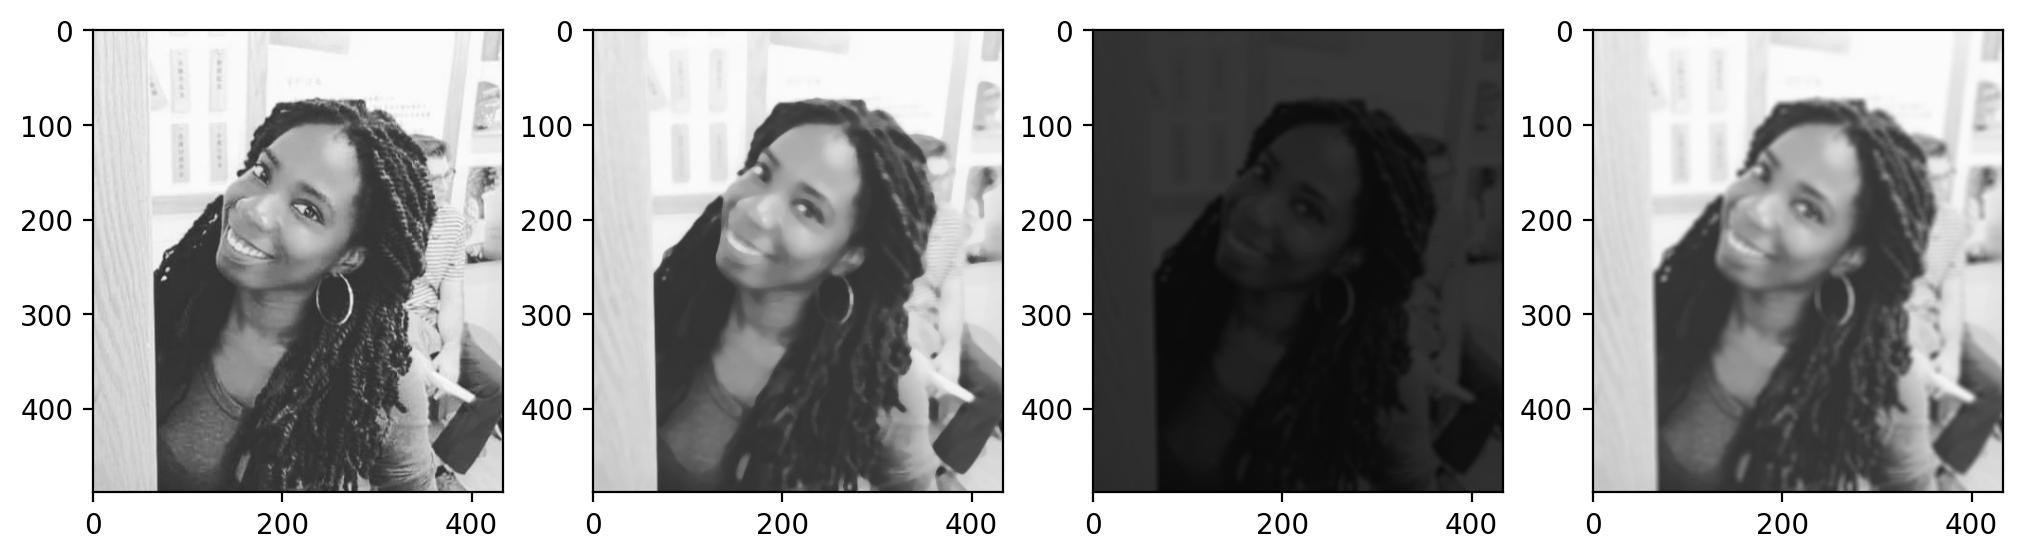

In [15]:
img = plt.imread('pic.jpg')#Let's import my profile picture
kernel = np.ones((7, 7), np.float32) / 225 # I'll use a kernel of size 7
blur1 = cv2.medianBlur(img,7) #using median function
blur2 = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
blur3 = cv2.GaussianBlur(img,(7,7),cv2.BORDER_DEFAULT) 

fig, ax = plt.subplots(1,4,figsize = (10,3),constrained_layout=True)
ax[0].imshow(img)
ax[1].imshow(blur1)
ax[2].imshow(blur2)
ax[3].imshow(blur3)

## Resizing

In [16]:
# This function downscales an incoming picture by a linear factor of n.
# This yields a picture that's n^2 smaller (in area) than the original.
def downscale(pic,n):
    rows, cols, temp = np.shape(pic)
    rows = int(n * int(rows/n)) # make sure rows are divisible by n
    cols = int(n * int(cols/n)) # make sure cols are divisible by n
    pic = pic[:rows,:cols]
    rows = int(rows/n)
    cols = int(cols/n)
    smaller = np.zeros((rows,cols,3),np.float64)
    for i in range(rows):
        for j in range(cols):
            smaller[i,j,0] = np.average(pic[i*n:i*n+n,j*n:j*n+n,0])  #    Red Channel
            smaller[i,j,1] = np.average(pic[i*n:i*n+n,j*n:j*n+n,1])  # Green Channel
            smaller[i,j,2] = np.average(pic[i*n:i*n+n,j*n:j*n+n,2])  # Blue Channel
    return smaller

In [17]:
# This function upscales an incoming picture by a linear factor of 2.
# This yields a picture that's 4 times larger (in area) than the original.
def upscale_by_2(pic):
    rows, cols, temp = np.shape(pic)
    last_row = pic[rows-1]
    pic = np.insert(pic, -1, last_row, axis=0)
    last_col = pic[:,cols-1]
    pic = np.insert(pic, -1, last_col, axis=1)+0.0
    larger = np.zeros((rows*2,cols*2,3),np.float64)
    for i in range(rows):
        il = i * 2
        for j in range(cols):
            jl = j * 2
            larger[il,jl] = pic[i,j]  # top-left pixel
            
            # top-right pixel:
            larger[il,jl+1,0] = (pic[i,j,0]+pic[i,j+1,0])/2  #    Red Channel
            larger[il,jl+1,1] = (pic[i,j,1]+pic[i,j+1,1])/2  # Green Channel
            larger[il,jl+1,2] = (pic[i,j,2]+pic[i,j+1,2])/2  # Blue Channel
            
            # bottom-left pixel:
            larger[il+1,jl,0] = (pic[i,j,0]+pic[i+1,j,0])/2  #    Red Channel
            larger[il+1,jl,1] = (pic[i,j,1]+pic[i+1,j,1])/2  # Green Channel
            larger[il+1,jl,2] = (pic[i,j,2]+pic[i+1,j,2])/2  # Blue Channel
            
            # bottom-right pixel:
            larger[il+1,jl+1,0] = (pic[i,j,0]+pic[i+1,j+1,0])/2  #    Red Channel
            larger[il+1,jl+1,1] = (pic[i,j,1]+pic[i+1,j+1,1])/2  # Green Channel
            larger[il+1,jl+1,2] = (pic[i,j,2]+pic[i+1,j+1,2])/2  # Blue Channel

    return larger

In [ ]:
gate = plt.imread('golden_gate.jpg')#Let's import a picture of the golden gate
